In [25]:
!pip install pandas-datareader
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline

In [26]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [27]:
# BANK OF AMERICA
BAC=data.DataReader('BAC','yahoo',start, end)

In [28]:
# CITI GROUP
C=data.DataReader('C','yahoo',start, end)

In [29]:
# GOLDMAN SACHS
GS=data.DataReader('GS','yahoo',start, end)

In [30]:
#JPMORGAN CHASE
JPM=data.DataReader('JPM','yahoo',start, end)

In [31]:
#MORGAN STANLEY
MS=data.DataReader('MS','yahoo',start, end)

In [32]:
# WELLS FARGO
WFC=data.DataReader('WFC','yahoo',start, end)

In [33]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [34]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)
bank_stocks.columns.names=['Bank Ticker', 'Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.280807  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.916729  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.960411  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.909451  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.931290  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.364140  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.389069  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.488869  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.526283  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.912933  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.613142  
2006-01-04   31.799999  31.530001  10870000.0  20.374050  
2006-01-05   31.500000  31.495001  10158000.0  20.351437  
2006-01-06   31.580000  31.680000   8403800.0  20.470978  
2006-01-09   31.674999  31.674999   5619600.0  20.467749  

[5 rows x 36 columns]

## **What is the max Close price for each bank's stock throughout the time period?**

In [35]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()   #Return cross-section from the Series/DataFrame.

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

## **Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [36]:
returns = pd.DataFrame()

In [37]:
for tick in tickers:
    returns[tick+ ' Return'] = bank_stocks[tick]['Close'].pct_change()

returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005874
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586   -0.000158

## **Create a pairplot using seaborn of the returns dataframe.**

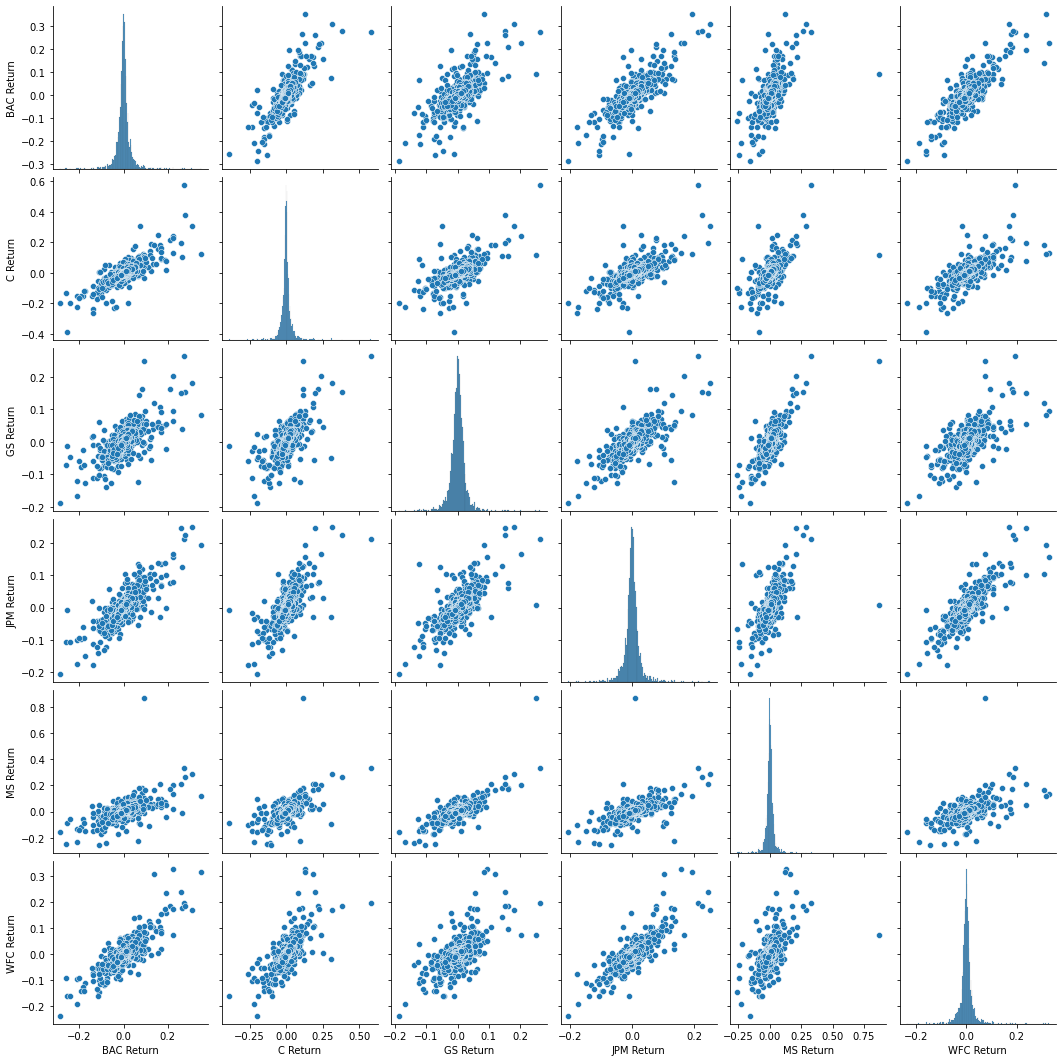

In [38]:
sns.pairplot(returns[1:])   # Because the first row is NaN

## **Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [40]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [41]:
returns.idxmin()   # NEWS: Barack Obama is inaugurated as the 44th President of the United States of America, becoming the first African-American President of the United States.

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

## **Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [42]:
returns.std()  # Higher the standard deviation, higher the risk, We can see Citi Group is most risky.

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [45]:
returns.loc['2015-01-01':'2015-12-31'].std()   # Bank of america & Morgan stanley are at highest risk in year 2015

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

## **Create a displot using seaborn of the 2015 returns for Morgan Stanley**

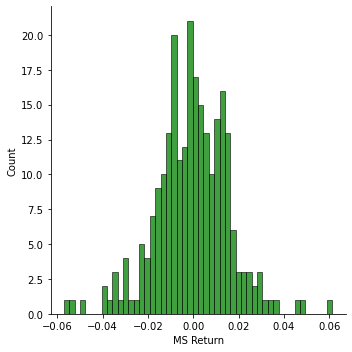

In [54]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green'
            ,bins=50)

## **Create a distplot using seaborn of the 2008 returns for CitiGroup**

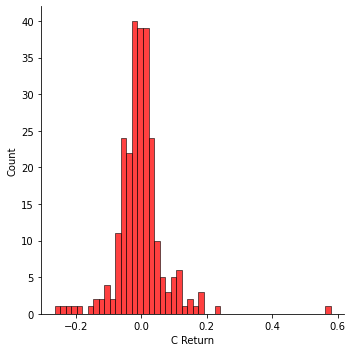

In [56]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red'
            ,bins=50)

## **More Visualizations**

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

## **Create a line plot showing Close price for each bank for the entire index of time.**

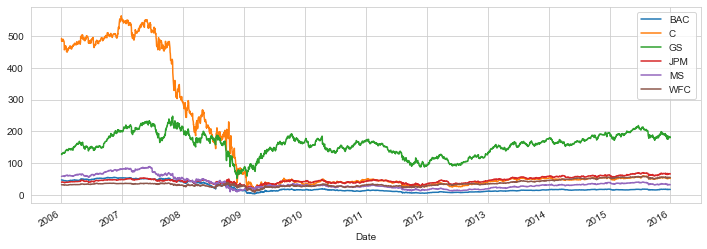

In [58]:
# Method 1: Using for loop
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

<AxesSubplot:xlabel='Date'>

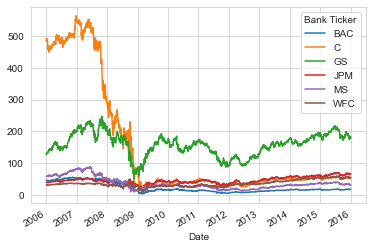

In [59]:
# Method 2 using cross section
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [61]:
# Method 3 Using plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## **Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

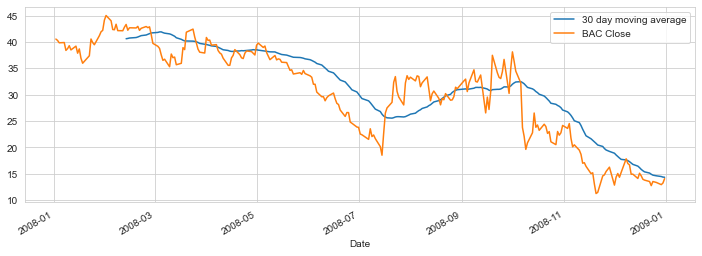

In [71]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day moving average')   #pandas has this method rolling for moving averages
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

## **Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

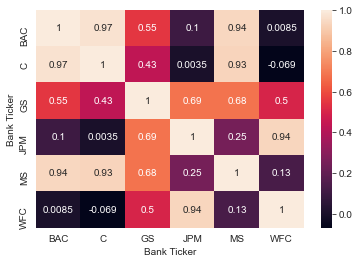

In [73]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

## **Use seaborn's clustermap to cluster the correlations together:**

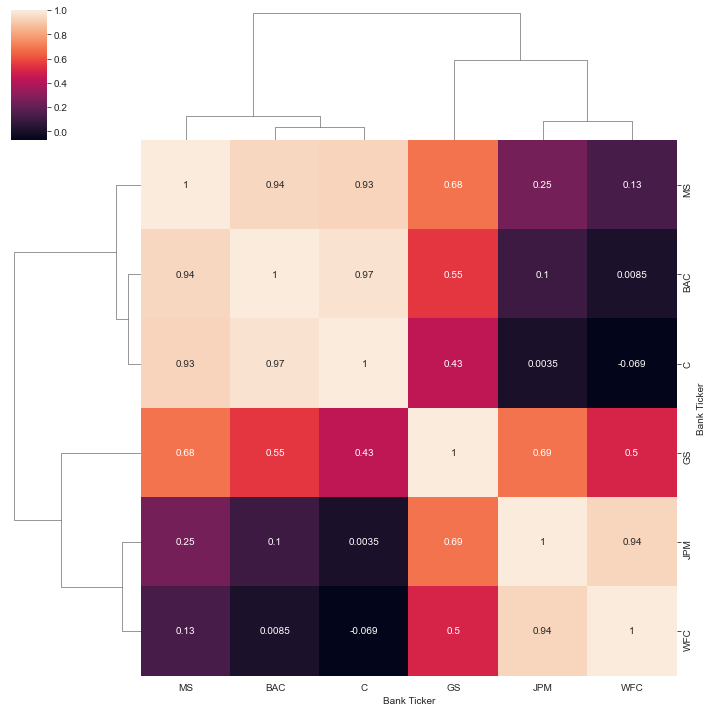

In [74]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [76]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

In [78]:
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

## **Create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [80]:
bac15 = BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']
bac15.iplot(kind='candle')

## **Create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [81]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55])  # ta_plot is technical analysis plot in cufflinks

## **Create a Bollinger Band Plot for Bank of America for the year 2015.**

In [83]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')  # shows the upper and lower bands as we hover